<a href="https://colab.research.google.com/github/shounakk05/ML_basic_projects/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Description

This project leverages the Wine Quality dataset from Kaggle to build a machine learning model for predicting wine quality based on several physicochemical properties of wine samples. Using Google Colab as the development environment, the data is processed, explored, and modeled using the Random Forest algorithm, a robust ensemble technique known for its accuracy in classification tasks.
***

### Key Steps

- Uses the Wine Quality dataset from Kaggle, featuring physicochemical attributes of wines.

- Data is cleaned, visualized, and prepared for modeling in Google Colab.

- Random Forest Classifier is trained to classify wine quality based on input features.

- Evaluates model accuracy and feature importance to understand key factors affecting wine quality.

- Provides practical experience in data preprocessing, machine learning, and model interpretation using Colab.



Importing Dependencies

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [18]:
df = pd.read_csv('/content/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [19]:
df.shape

(1143, 13)

In [20]:
df = df.drop('Id', axis=1)

In [21]:
#Checking for missing values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Data Analysis and Visualization

In [22]:
#Statistical values
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
#number of values for each quality
df.value_counts('quality')

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


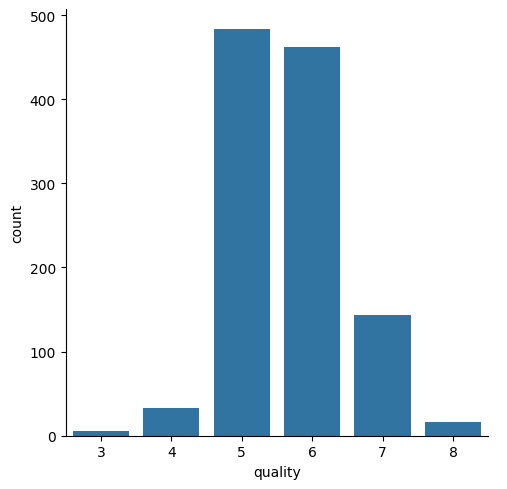

In [24]:
#Visualisation of the value counts
sns.catplot(x='quality', data=df, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

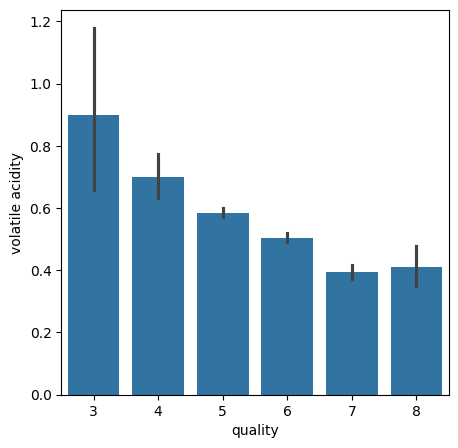

In [25]:
#Volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=df)
#This shows that the Volatile acidity and Quality are inversly proportional

<Axes: xlabel='quality', ylabel='citric acid'>

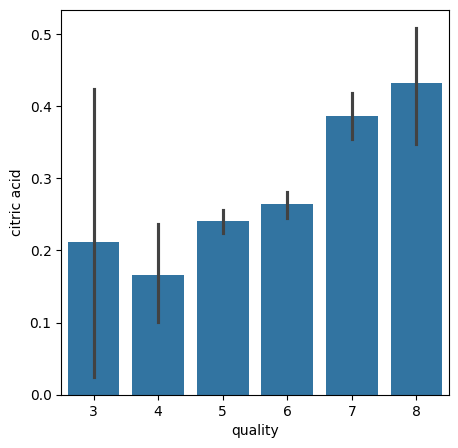

In [26]:
#Citric Acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=df)
#This shows that the Volatile acidity and Quality are directly proportional

Correlation

In [27]:
corrl = df.corr()

<Axes: >

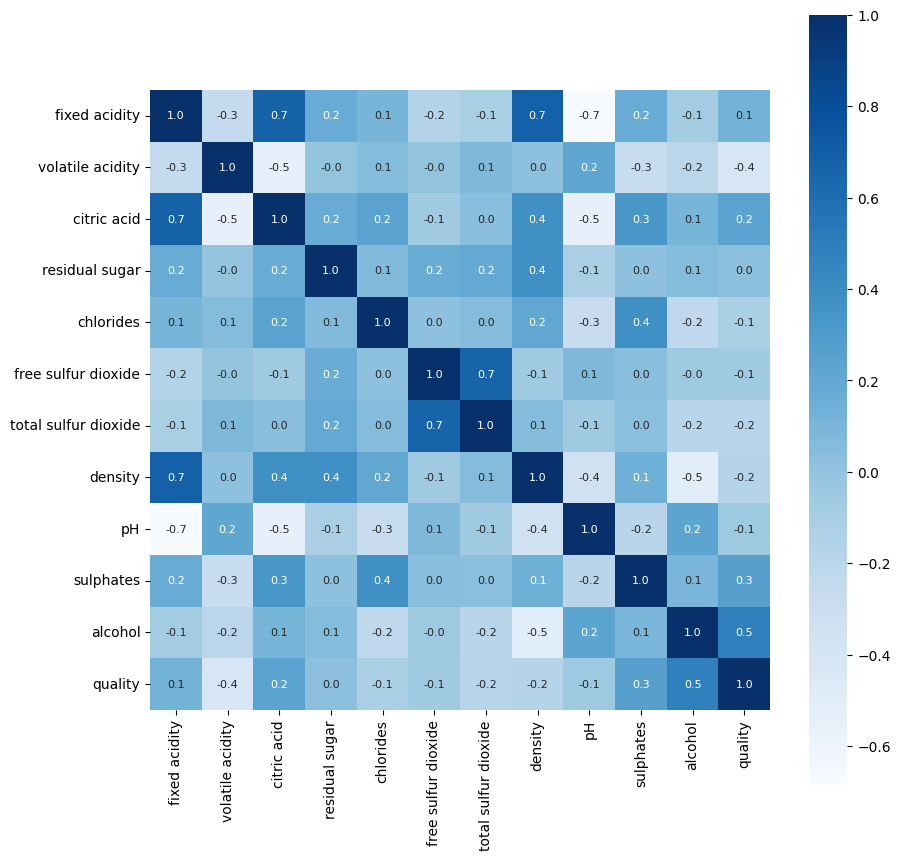

In [28]:
#Constructing a heatmap to understand correlation between columns
plt.figure(figsize=(10,10))
sns.heatmap(corrl, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
#From this heatmap we observe that alcohol has the most positive correlation with quality
#Whereas Volatile Acidity has the most negative correlation with quality

Data preprocessing

In [29]:
#Seperating the data and label
X = df.drop('quality', axis=1)

Label Binarization
1.   quality>=7 --> good(1)
2.   quality<=6 --> bad(0)



In [30]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


Splitting into Train and Test data

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape, Y.shape, Y_train.shape, Y_test.shape)

(1143, 11) (914, 11) (229, 11) (1143,) (914,) (229,)


Model Training:

Random Forest Classifier Model

In [34]:
model = RandomForestClassifier()

In [36]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

In [37]:
#Accuracy Score of test data
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

In [38]:
print('Accuracy of test data: ', test_data_accuracy)

Accuracy of test data:  0.9213973799126638


Build a predictive system

In [43]:
ip_data = (7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,3.04,1.08,9.2)
#changing the input data to a numpy array
ip_as_array = np.asarray(ip_data)
#reshaping the data as we are predicting the label for only one instance
ip_reshaped = ip_as_array.reshape(1,-1)

prediction = model.predict(ip_reshaped)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Bad Quality Wine


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [44]:
ip_data = (8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7)
#changing the input data to a numpy array
ip_as_array = np.asarray(ip_data)
#reshaping the data as we are predicting the label for only one instance
ip_reshaped = ip_as_array.reshape(1,-1)

prediction = model.predict(ip_reshaped)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Good Quality Wine


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
